# Titanic EDA #


## Step 1: Reading the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### To check what columns need to be cleaned

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Step 2: Cleaning the data

**1** . Create a bar chart showing how many missing values are in each column

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
missing_values=train.isnull().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

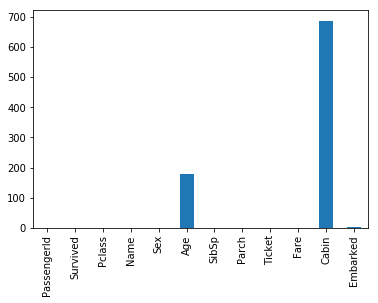

In [6]:
missing_values.plot(kind='bar')

**2** . Which column has the most `NaN` values?

In [7]:
missing_values.idxmax()

'Cabin'

How many cells in that column are empty?

In [8]:
missing_values.max()

687

**3**. Delete all rows where `Embarked` is empty

In [9]:
train.dropna(subset=['Embarked'],inplace=True)
train.shape

(889, 12)

In [10]:
# To make sure they are deleted
train['Embarked'].isnull().sum()

0

**4**. Fill all empty cabins with **¯\\_(ツ)_/¯**
 
 Note: `NaN`, empty, and missing are synonymous.

In [11]:
train.Cabin.fillna(value='¯\(ツ)/¯', inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction

**1**. There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [12]:
train['FamilyCount']=train['SibSp'] +train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0


**2**. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [13]:
train['IsReverand']=(train['Name'].str.contains('Rev')).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [14]:
# Checking how many preacher on the plane
train['IsReverand'].sum()

6

**3**. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`

Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column

In [16]:
train_dum=pd.get_dummies(train,columns=(['Embarked','Sex']))
train_dum

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsReverand,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,¯\(ツ)/¯,0,0,0,1,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,0,0,0,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,¯\(ツ)/¯,4,0,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,¯\(ツ)/¯,2,0,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,¯\(ツ)/¯,1,0,1,0,0,1,0


Do the same thing for `Sex`

### the dummy columns for the 'Sex' column is created with the 'Embarked' above

BONUS: Extract the title from everyone's name and create dummy columns

In [17]:
train['title']=train['Name'].str.extract('([a-zA-Z ]+)\.')
pd.get_dummies(train,columns=(['title']))

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title_ Master,title_ Miss,title_ Mlle,title_ Mme,title_ Mr,title_ Mrs,title_ Ms,title_ Rev,title_ Sir,title_ the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,1,0,0,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,0,0,0,0,1,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,0,1,0,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,1,0,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,0,0,1,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis

**1**. What was the survival rate overall?

In [18]:
survival=train['Survived'].value_counts(normalize=True)[1]
print("Survival Rate: %s" %(survival))

Survival Rate: 0.382452193476


**2**. Which gender fared the worst? 

### Males have lower survival rate and thus fared the worst

In [19]:
Male_Survival_Rate= train_dum.groupby('Sex_male')['Survived'].value_counts(normalize=True)[1][1]
print("Male Survival Rate: %s" %(Male_Survival_Rate))
print("Males have lower survival rate - Males fared the worst")

Male Survival Rate: 0.188908145581
Males have lower survival rate - Males fared the worst


In [20]:
Female_Survival_Rate= train_dum.groupby('Sex_female')['Survived'].value_counts(normalize=True)[1][1]
print("Female Survival Rate: %s" %(Female_Survival_Rate))

Female Survival Rate: 0.740384615385


What was their survival rate?

In [21]:
Male_Survival_Rate= train_dum.groupby('Sex_male')['Survived'].value_counts(normalize=True)[1][1]
print("Male Survival Rate: %s" %(Male_Survival_Rate))

Male Survival Rate: 0.188908145581


**3**. What was the survival rate for each `Pclass`?

In [22]:
P1= train.groupby('Pclass')['Survived'].value_counts(normalize=True)[1][1]
P2= train.groupby('Pclass')['Survived'].value_counts(normalize=True) [2][1]
P3= train.groupby('Pclass')['Survived'].value_counts(normalize=True) [3][1]
print("Survival Rate for upper class: %s" %P1)
print("Survival Rate for middle class: %s" %P2)
print("Survival Rate for ulower class: %s" %P3)

Survival Rate for upper class: 0.626168224299
Survival Rate for middle class: 0.472826086957
Survival Rate for ulower class: 0.242362525458


**4**. Did any reverends survive? How many?

In [23]:
rev_survived=(train['Survived'].groupby(train['IsReverand']==1)).sum()[1]
print ("Number of reverands survived: %s" % rev_survived)

Number of reverands survived: 0


**5**. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [24]:
cabin_survived=train.groupby(train['Cabin']=='¯\(ツ)/¯')['Survived'].value_counts(normalize=True)[1][1]
print( "Survival Rate for cabins marked ¯\(ツ)/¯: %s" % cabin_survived)

Survival Rate for cabins marked ¯\(ツ)/¯: 0.299854439592


**6** . What is the survival rate for people whose `Age` is empty?

In [25]:
empty_age_survived=train.groupby(train['Age'].isnull())['Survived'].value_counts(normalize=True)[1][1]
print ( "Survival rate for people whose age is empty: %s" %empty_age_survived)

Survival rate for people whose age is empty: 0.293785310734


**7** .What is the survival rate for each port of embarkation?

In [26]:
c=train.groupby(train_dum['Embarked_C'])['Survived'].value_counts(normalize=True)[1][1]
q=train.groupby(train_dum['Embarked_Q'])['Survived'].value_counts(normalize=True)[1][1]
s=train.groupby(train_dum['Embarked_S'])['Survived'].value_counts(normalize=True)[1][1]
print ("Survival Rate for Port_C : %s" %c)
print ("Survival Rate for Port_Q : %s" %q)
print ("Survival Rate for Port_s : %s" %s)

Survival Rate for Port_C : 0.553571428571
Survival Rate for Port_Q : 0.38961038961
Survival Rate for Port_s : 0.336956521739


**8** .What is the survival rate for children (under 12) in each `Pclass`?

In [27]:
age_p1=train[train['Age']<12]['Survived'].groupby(train['Pclass']).value_counts(normalize=True)[1][1]
age_p2=train[train['Age']<12]['Survived'].groupby(train['Pclass']).value_counts(normalize=True)[2][1]
age_p3=train[train['Age']<12]['Survived'].groupby(train['Pclass']).value_counts(normalize=True)[3][1]
print( "Survival Rate for children under 12 in the Upper Clas: %s" % age_p1)
print( "Survival Rate for children under 12 in the Middle Clas: %s" % age_p2)
print( "Survival Rate for children under 12 in the Lower Clas: %s" % age_p3)

Survival Rate for children under 12 in the Upper Clas: 0.75
Survival Rate for children under 12 in the Middle Clas: 1.0
Survival Rate for children under 12 in the Lower Clas: 0.404255319149


**9** . Did the captain of the ship survive? Is he on the list?

### Based on the assumption that the captain of the flight will be listed on the list with title 'Capt. Yes the captain is on the list and he didn't survive

In [28]:
train[train['Name'].str.contains('Cap')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,title
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,Capt


**10** . Of all the people that died, who had the most expensive ticket? How much did it cost?

In [29]:
mask=train[train['Survived']==0]
mask_fare = mask['Fare'].max()
print ("Most Expensive Ticket of all people died: %s" %mask_fare)

Most Expensive Ticket of all people died: 263.0


In [30]:
mask[mask['Fare']==mask_fare]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverand,title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,Mr
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,Mr


In [31]:
print ("Fortune, Mr. Charles Alexander and Fortune, Mr. Mark got the most expensive ticket among people died")

Fortune, Mr. Charles Alexander and Fortune, Mr. Mark got the most expensive ticket among people died


**11**. Does having family on the boat help or hurt your chances of survival?

In [32]:
train.groupby(train['FamilyCount']>0)['Survived'].value_counts(normalize=True)

FamilyCount  Survived
False        0           0.699065
             1           0.300935
True         1           0.505650
             0           0.494350
Name: Survived, dtype: float64

### Realistically, large families are more likely to group together and rescue each other than being alone. The analysis above shows 50% survival rate for family greater than 0 vs. 30% survial rate for traveling alone.

## Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

### 1. Survival Rate by gender

### women are more likely to survive

In [33]:
x=train_dum.groupby('Sex_male')['Survived'].value_counts(normalize=True)[1]
y=train_dum.groupby('Sex_female')['Survived'].value_counts(normalize=True)[1]

#creating DF of gender(M,F) and survivors/non-survivors 
df_gender = pd.DataFrame([x,y])
df_gender.rename(columns={0:'Dead', 1:'Survived'}, inplace=True)
df_gender.index=(['Male','Female'])

Text(0,0.5,'Survival Rate')

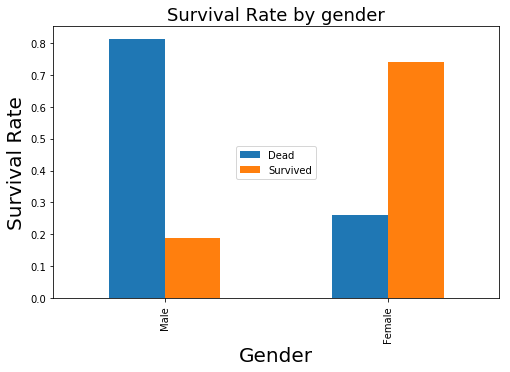

In [34]:
#plotting bar chart of survival rate by gender
df_gender.plot(kind='bar',figsize=(8,5))

plt.legend(loc='center')
plt.title('Survival Rate by gender', fontsize=18)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

### 2. Survival Rate by Class
### Passengers with upper and middle class have higher survival rate than the lower class

In [35]:
#creating DF for pclass and survived/died
P1=train.groupby('Pclass')['Survived'].value_counts(normalize=True)[1]
P2=train.groupby('Pclass')['Survived'].value_counts(normalize=True)[2]
P3=train.groupby('Pclass')['Survived'].value_counts(normalize=True)[3]
df_Pclass=pd.DataFrame([P1,P2,P3])

In [36]:
df_Pclass.rename(columns={0:'Dead', 1:'Survived'}, inplace=True)
df_Pclass.index=(['Class_1','Class_2','Class_3'])

Text(0,0.5,'Count')

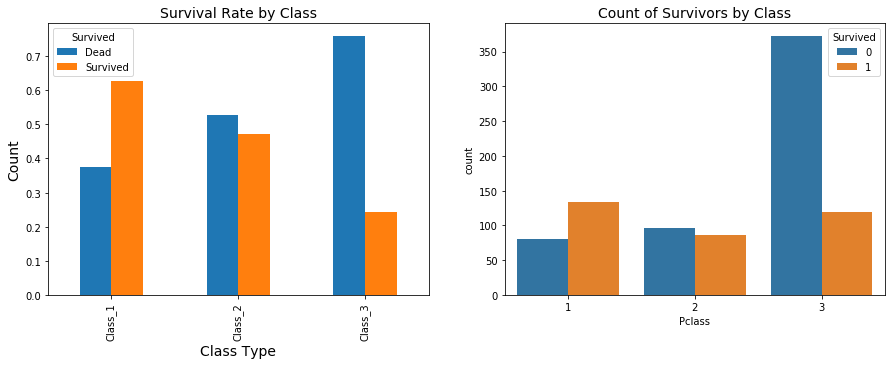

In [37]:
#plotting count of survivors and survival rate
figure, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

df_Pclass.plot(kind='bar',ax=ax1)
ax1.set_title('Survival Rate by Class', fontsize=14)
ax1.set_xlabel('Class Type',fontsize=14)
ax1.set_ylabel('Survival Rate', fontsize=14)

sns.countplot(data=train, x='Pclass',hue='Survived', ax=ax2)
ax2.set_title("Count of Survivors by Class",fontsize=14)
ax1.set_xlabel('Class Type',fontsize=14)
ax1.set_ylabel('Count', fontsize=14)

### 3. Distribution of Passengers Fare

### Number of passengers survived increased as the fare got higher

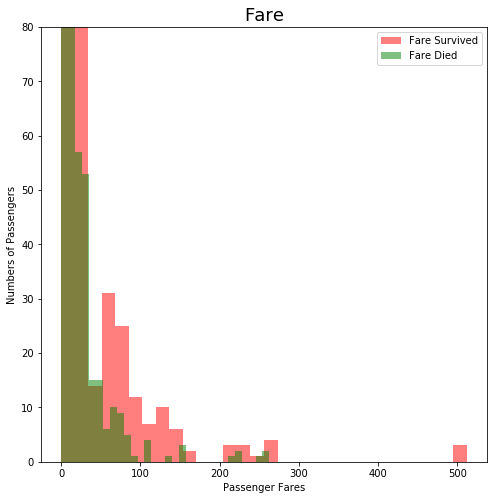

In [38]:
#Define Survived and Died dfs
survived = train[train['Survived'] == 1]
died = train[train['Survived'] == 0]

#Plot a histogram of Fare Survived size
plt.figure(figsize=(8,8))
plt.hist(survived['Fare'],bins=30,alpha=0.5,color='r',label='Fare Survived')

#Plot a histogram of Fare Died size
plt.hist(died['Fare'],bins=30,alpha=0.5,color='g',label='Fare Died')

#Set the x and y boundaries of the figure
plt.ylim([0, 80])

#Set the title and labels
plt.title('Fare', fontsize = 18)
plt.xlabel('Passenger Fares')
plt.ylabel('Numbers of Passengers')
plt.legend(loc='upper right')

### 4. Survival Rate by Age

### Passengers under age 12 have higher survival rate than those between 20-50

In [39]:
train_age=train[train['Age']>0]

/Users/tala/Desktop/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


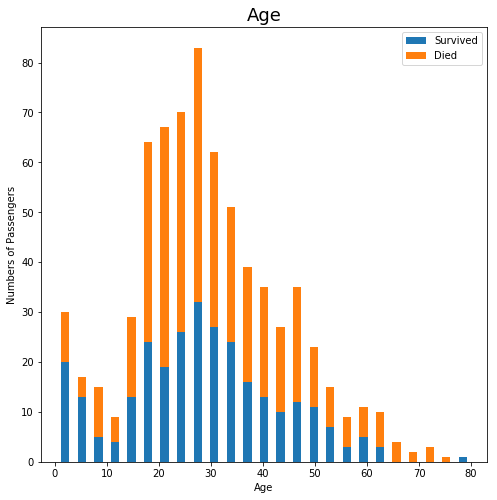

In [40]:
survived_age = train_age[train_age['Survived'] == 1]
died_age = train_age[train_age['Survived'] == 0]

plt.figure(figsize=(8,8))
plt.hist([survived_age['Age'], died_age['Age']],stacked=True,bins=25,rwidth=0.5,
        label=['Survived','Died'])

# Set the title and labels
plt.title('Age', fontsize = 18)
plt.xlabel('Age')
plt.ylabel('Numbers of Passengers')
plt.legend(loc='upper right')

### 5. Correlation between Columns

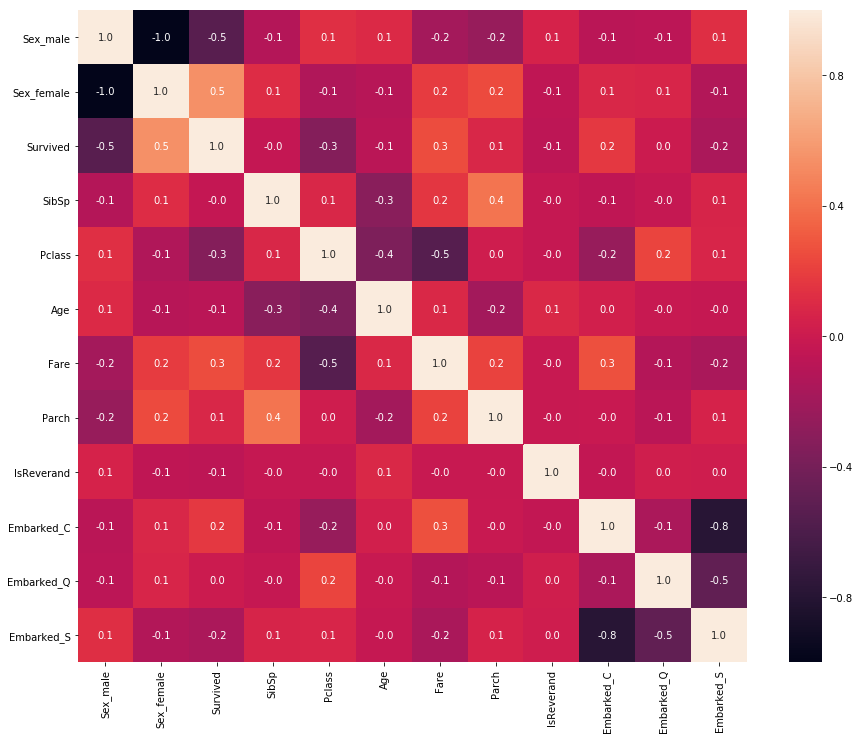

In [41]:
# Examine correlation between (certain) numberic columns
sns.mpl.pyplot.figure(figsize=(15, 12))
sns.heatmap(train_dum[["Sex_male","Sex_female","Survived","SibSp","Pclass","Age","Fare","Parch","IsReverand",
                "Embarked_C","Embarked_Q","Embarked_S"]].corr(), annot=True, fmt=".1f")

### 6. Side-by-side Comparison of Survival by Class and Gender

Side-by-side comparison of survival by class and gender


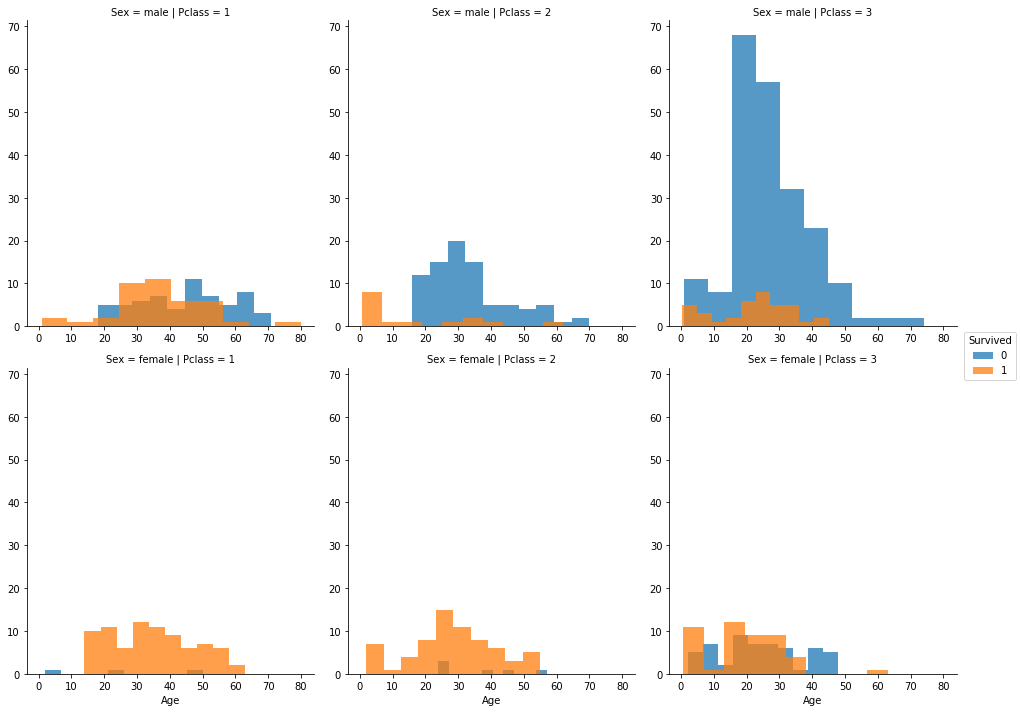

In [42]:
print("Side-by-side comparison of survival by class and gender")
f_grid = sns.FacetGrid(train, row='Sex', col='Pclass', hue='Survived', size=5, aspect=.9)
f_grid.map(sns.mpl.pyplot.hist, 'Age', alpha = .75)
f_grid.add_legend();

### 7. Percent of Passengers Leaving from each Embarkation

In [43]:
top_locations = pd.DataFrame(train["Embarked"].value_counts(normalize=True).head().reset_index())
top_locations.columns = ["location","count"]

([<matplotlib.patches.Wedge at 0x1a2077dda0>,
 [Text(-0.83777,-0.71284,'S'),
  Text(0.99853,0.461452,'C'),
  Text(0.295637,1.05953,'Q')],
 [Text(-0.456966,-0.388822,'72.4%'),
  Text(0.544653,0.251701,'18.9%'),
  Text(0.161257,0.577924,'8.7%')])

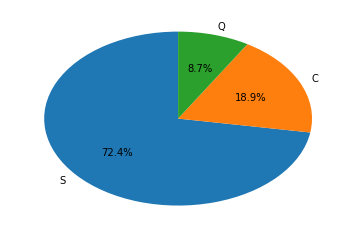

In [44]:
sns.mpl.pyplot.pie(top_locations['count'], labels=top_locations['location'],
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%')

### 8. Percent of Survivors of Total Survivors from each Embarkation

([<matplotlib.patches.Wedge at 0x1a20a96198>,
 [Text(-0.997891,-0.462832,'S'),
  Text(1.08646,0.172078,'C'),
  Text(0.301029,1.05801,'Q')],
 [Text(-0.544304,-0.252454,'63.8%'),
  Text(0.592613,0.0938606,'27.4%'),
  Text(0.164198,0.577095,'8.8%')])

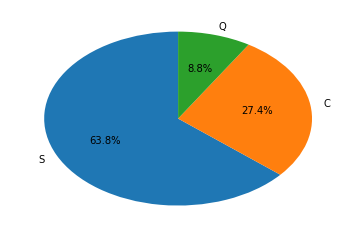

In [45]:
top_locations = pd.DataFrame(train[train["Survived"]==1]["Embarked"].value_counts(normalize=True).head().reset_index())
top_locations.columns = ["location","count"]
top_locations

sns.mpl.pyplot.pie(
    top_locations['count'],
    labels=top_locations['location'],
    # with no shadows
    shadow=False,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%')

### 9. Number of Survivors based on Family Size 

Family Size Histogram by Survival


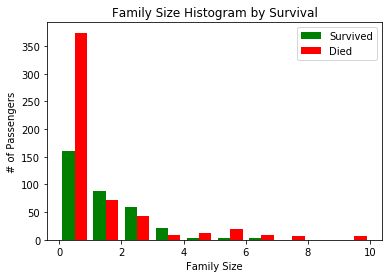

In [46]:
print("Family Size Histogram by Survival")
sns.mpl.pyplot.hist(x = [train[train['Survived']==1]['FamilyCount'].values, 
                         train[train['Survived']==0]['FamilyCount'].values], 
         color = ['g','r'],label = ['Survived','Died'])
sns.mpl.pyplot.title('Family Size Histogram by Survival')
sns.mpl.pyplot.xlabel('Family Size')
sns.mpl.pyplot.ylabel('# of Passengers')
sns.mpl.pyplot.legend()

### 10. Survival Rate Per Class, Gender, and Pclass

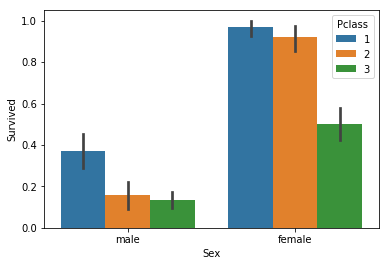

In [47]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train)